## Affine変換（スキュー）

True

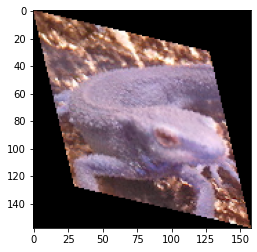

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def Affine(img, dx=30, dy=30):
    # get shape
    H,W, C = img.shape
    
    # Affine hyper parameters
    a=1.
    b = dx/H
    c = dy/W
    d = 1.
    tx = 0.
    ty = 0.
    
    # prepare temporary
    _img = np.zeros((H+2, W+2, C), dtype=np.float32)
    
    # insert image to center of temporary
    _img[1:H+1, 1:W+1] = img
    
    # prepare affine image temporary
    # 切り上げ
    H_new = np.ceil(dy+H).astype(np.int)
    W_new = np.ceil(dx+W).astype(np.int)
    out = np.zeros((H_new, W_new, C), dtype=np.float32)
    
    # prepare assigned index
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)
    
    # prepare inverse matrix for affine
    abcd = a*d - b*c
    x = np.round((d*x_new - b*y_new) / abcd).astype(np.int) - tx +1
    y = np.round((-c*x_new + a*y_new)/abcd).astype(np.int) - ty +1
    
    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)
    
    # assign value from ariginal to affine image
    out[y_new, x_new] = _img[y,x]
    out = out.astype(np.uint8)
    
    return out

img = cv2.imread('../imori.jpg').astype(np.float32)
out = Affine(img, dx=30, dy=30)
plt.imshow(out)
cv2.imwrite('out31xy.jpg', out)

  


True

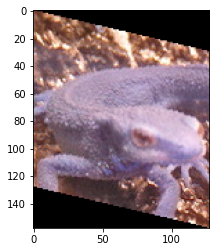

In [5]:
out = Affine(img, dx=0, dy=30)
plt.imshow(out)
cv2.imwrite('out31y.jpg', out) 

True

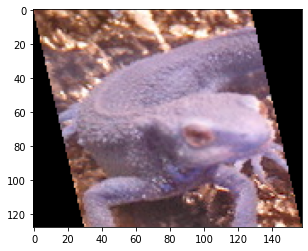

In [6]:

out = Affine(img, dx=30, dy=0)
plt.imshow(out)
cv2.imwrite('out31x.jpg', out)